In [5]:
import os
dataset_folder = "Dataset"

# 获取数据集文件夹中所有子文件夹的列表
subfolders = [f.path for f in os.scandir(dataset_folder) if f.is_dir()]

# 遍历每个子文件夹并计算图像文件的数量
for subfolder in subfolders:
    image_files = [f for f in os.listdir(subfolder) if f.endswith(".jpg") or f.endswith(".png")]
    num_images = len(image_files)
    print(f"Folder {subfolder} contains {num_images} images.")


Folder Dataset/03 contains 210 images.
Folder Dataset/04 contains 289 images.
Folder Dataset/05 contains 360 images.
Folder Dataset/02 contains 311 images.
Folder Dataset/11 contains 292 images.
Folder Dataset/10 contains 410 images.
Folder Dataset/07 contains 260 images.
Folder Dataset/00 contains 216 images.
Folder Dataset/09 contains 374 images.
Folder Dataset/08 contains 308 images.
Folder Dataset/01 contains 241 images.
Folder Dataset/06 contains 328 images.
Folder Dataset/12 contains 356 images.
Folder Dataset/13 contains 215 images.
Folder Dataset/14 contains 315 images.


In [6]:
#展示目录结构
data_dir = 'Dataset' 
root,dirs,files=next(os.walk(data_dir))
print(os.walk(data_dir))
print("root:",root)
print("dirs:",dirs)
#print("files:",files)

file_03 = os.listdir(data_dir + "/" + dirs[0])
print("03:",file_03)

<generator object _walk at 0x114574600>
root: Dataset
dirs: ['03', '04', '05', '02', '11', '10', '07', '00', '09', '08', '01', '06', '12', '13', '14']
03: ['823.jpg', '837.jpg', '957.jpg', '943.jpg', '770.jpg', '771.jpg', '942.jpg', '956.jpg', '836.jpg', '822.jpg', '834.jpg', '820.jpg', '808.jpg', '940.jpg', '798.jpg', '954.jpg', '968.jpg', '773.jpg', '772.jpg', '969.jpg', '955.jpg', '799.jpg', '941.jpg', '809.jpg', '821.jpg', '835.jpg', '819.jpg', '831.jpg', '825.jpg', '945.jpg', '951.jpg', '789.jpg', '776.jpg', '777.jpg', '788.jpg', '950.jpg', '944.jpg', '978.jpg', '824.jpg', '830.jpg', '818.jpg', '826.jpg', '832.jpg', '952.jpg', '946.jpg', '775.jpg', '774.jpg', '947.jpg', '953.jpg', '833.jpg', '827.jpg', '840.jpg', '854.jpg', '868.jpg', '883.jpg', '897.jpg', '934.jpg', '920.jpg', '908.jpg', '909.jpg', '921.jpg', '935.jpg', '896.jpg', '882.jpg', '869.jpg', '855.jpg', '841.jpg', '857.jpg', '843.jpg', '894.jpg', '880.jpg', '923.jpg', '937.jpg', '936.jpg', '922.jpg', '881.jpg', '895.jpg

In [7]:
#展示SIFT特征提取
import cv2
from SIFT import *
from IPython.display import display, Image

img=cv2.imread(data_dir + "/" + dirs[0]+ "/" +file_03[0])
sift=SIFT(img,3)
sift.SIFT_features()
print("descriptors:",sift.descriptors)
print("keypoints:",sift.keypoints)

sift.SIFT_Norm()
print("descriptors(norm):",sift.descriptors)


descriptors: [[ 26.  13.  54. ...   0.   0.   0.]
 [ 10.   0.   0. ...   0.   3.  10.]
 [ 48.  80.   0. ...   7.   6.   4.]
 ...
 [ 20.  14.  25. ...  13.   0.   0.]
 [  5. 100.  15. ...   0.   3.  84.]
 [  1.  11.  66. ...   0.   0.   0.]]
keypoints: (< cv2.KeyPoint 0x1344f5470>, < cv2.KeyPoint 0x1344f54a0>, < cv2.KeyPoint 0x1344f6d60>, < cv2.KeyPoint 0x1344f7300>, < cv2.KeyPoint 0x1344f7240>, < cv2.KeyPoint 0x1344f7450>, < cv2.KeyPoint 0x1344f72d0>, < cv2.KeyPoint 0x1344f72a0>, < cv2.KeyPoint 0x1344f7210>, < cv2.KeyPoint 0x1344f7180>, < cv2.KeyPoint 0x1344f7150>, < cv2.KeyPoint 0x1344f7120>, < cv2.KeyPoint 0x1344f70f0>, < cv2.KeyPoint 0x1344f7090>, < cv2.KeyPoint 0x1344f7060>, < cv2.KeyPoint 0x1344f7000>, < cv2.KeyPoint 0x1344f6f70>, < cv2.KeyPoint 0x1344f7720>, < cv2.KeyPoint 0x1344f7750>, < cv2.KeyPoint 0x1344f7780>, < cv2.KeyPoint 0x1344f77b0>, < cv2.KeyPoint 0x1344f77e0>, < cv2.KeyPoint 0x1344f7810>, < cv2.KeyPoint 0x1344f7840>, < cv2.KeyPoint 0x1344f7870>, < cv2.KeyPoint 0x1344f

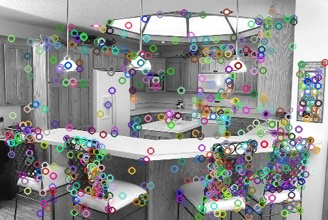

In [8]:
# 展示输入图像上的keypoints
output_image = cv2.drawKeypoints(img, sift.keypoints, None)

cv2.imwrite("output/output_image.jpg", output_image)
display(Image(filename="output/output_image.jpg"))

## 系统运行流程
1. **提取数据集中的样本，并划分训练集和测试集**
2. **提取SIFT特征**


In [9]:
import os
import cv2
from SIFT import *
import numpy as np
import random
from BoW import *
from SVM import *
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import LinearSegmentedColormap
from main import data_split,plotCM

bags_of_words_count = 200
dataset_path = "dataset"
random_seed = 3
random.seed(random_seed)
DataSplit=False


def data_split(data_dir):
    '''
    数据集切分
    '''
    train=[]
    test=[]

    root, dirs,_=next(os.walk(data_dir))
    """
    root: Dataset
    dirs: ['03', '04', '05', '02', '11', '10', '07', '00', '09', '08', '01', '06', '12', '13', '14']
    """
    descriptor_set = np.float32([]).reshape(0, 128)

    label=0
    for dir in dirs:
        files = os.listdir(root + "/" + dir)
       
        for i in range(len(files)):
            if i < 150:#遍历前150张图片

                #SIFT特征提取
                img = cv2.imread(root + "/" + dir + "/" + files[i])
                sift=SIFT(img,label)
                sift.SIFT_features()
                sift.SIFT_Norm()
                train.append(sift)
                descriptor_set = np.append(descriptor_set, sift.descriptors, axis=0)

            
            else:
                img = cv2.imread(root + "/" + dir + "/" + files[i])
                sift=SIFT(img,label)
                sift.SIFT_features()
                sift.SIFT_Norm()
                test.append(sift)
        label+=1
    

    np.save("npy/descriptor_set.npy", descriptor_set)
    return train, test

if DataSplit is False:#如果没有切分数据集
    train_samples, test_samples = data_split(dataset_path)
   
    print(f"Total training samples: {len(train_samples)}")
    print(f"Total testing samples: {len(test_samples)}")


Total training samples: 2250
Total testing samples: 2235


3.**聚类生成视觉词汇**：使用K-means算法将所有SIFT特征点分为n类，每类的中心点形成视觉词汇。

4.**生成词袋（字典）**：将n类特征点的中心点作为视觉词汇，创建一个词袋模型。

In [10]:
if DataSplit is False:#如果没有切分数据集
    # 初始化词袋模型，生成特征集
    bow = BoW(bags_of_words_count)
    bow.KMeans("npy/descriptor_set.npy", random_seed)

/Users/chenyubin/anaconda3/envs/ab/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5. **使用SPM算法生成图片的特征向量**

In [12]:
if DataSplit is False:#如果没有切分数据集
    # 使用SPM方法生成训练和测试数据的特征向量
    train_features, train_labels = bow.data2svm(train_samples)
    test_features, test_labels = bow.data2svm(test_samples)

    # 保存训练和测试数据
    np.save("npy/train_set.npy", train_features)
    np.save("npy/train_label.npy", train_labels)
    np.save("npy/test_set.npy", test_features)
    np.save("npy/test_label.npy", test_labels)

如果已经完成了数据集切分，可以直接载入

In [13]:
if DataSplit is True:
    # 加载已保存的训练和测试数据
    train_features = np.load("npy/train_set.npy")
    train_labels = np.load("npy/train_label.npy")
    test_features = np.load("npy/test_set.npy")
    test_labels = np.load("npy/test_label.npy")


6.**训练分类模型**：使用支持向量机（SVM）算法，以训练集中的图片特征向量作为数据集进行模型训练。

In [14]:
# 使用SVM分类器训练模型并进行预测
svm_model = train(train_features, train_labels)
train_predictions = predict(train_features, svm_model)
test_predictions = predict(test_features, svm_model)

7. **测试与评估**：

In [37]:
train_predictions = predict(train_features, svm_model)
test_predictions = predict(test_features, svm_model)
categories = os.listdir(dataset_path)

# 评估训练和测试结果
_,_,train_classification_report= evaluate(train_predictions, train_labels)
_,confu_matrix,test_classification_report = evaluate(test_predictions, test_labels)

# 绘制并保存混淆矩阵图
plotCM(range(15), confu_matrix, "output/confusion_matrix.png")
display(Image(filename="output/confusion_matrix.png"))
#print("训练集评估报告：")
#print(train_classification_report)
print("测试集评估报告：")
print(test_classification_report)

TypeError: can only concatenate list (not "range") to list

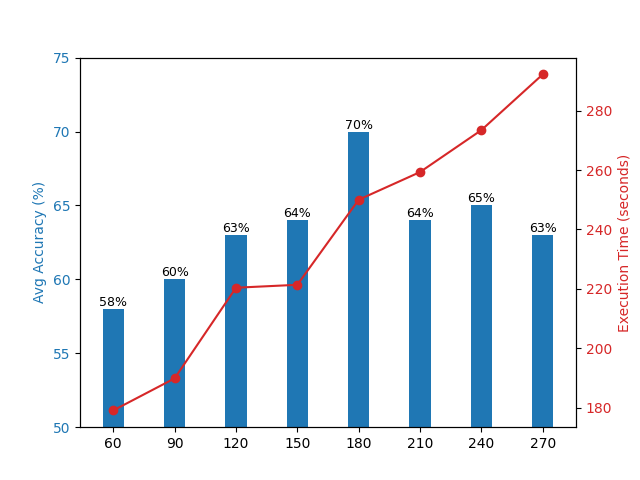

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Data
clusters = [60, 90, 120, 150, 180, 210, 240, 270]
accuracy = [58, 60, 63, 64, 70, 64, 65, 63]
execution_time = [179.05, 189.84, 220.38, 221.36, 250.02, 259.34, 273.47, 292.24]

# Plot
fig, ax1 = plt.subplots()

# Bar plot for accuracy
color = 'tab:blue'
ax1.set_ylabel('Avg Accuracy (%)', color=color)
bars = ax1.bar(np.arange(len(clusters)), accuracy, color=color, width=0.35)  # Adjust the width here
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(np.arange(len(clusters)))
ax1.set_xticklabels(clusters)

# Set y-axis limits for accuracy
ax1.set_ylim(50, 75)

# Annotate the y-axis values
for bar, acc in zip(bars, accuracy):
    ax1.text(bar.get_x() + bar.get_width() / 2, acc + 0.2, f'{acc}%', ha='center', color='black', fontsize=9)

# Twin the x-axis for the second plot
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Execution Time (seconds)', color=color)
ax2.plot(np.arange(len(clusters)), execution_time, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)




# Save plot as an image file
plt.savefig('output/acc_time.png')

display(Image(filename="output/acc_time.png"))


In [39]:
print(categories)
categor=['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14']
print(categor)

['03', '04', '05', '02', '11', '10', '07', '00', '09', '08', '01', '06', '12', '13', '14']
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14']
